In [1]:
# 데이터 프레임
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 회귀 예측 모델
from statsmodels.api import Logit

# 사이킷런
## 데이터 정제
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## 분류 모델
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
### 분류-TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## 그리드 서치
from sklearn.model_selection import GridSearchCV

## 평가
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 
from subprocess import call

# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

In [2]:
df_2021_sales = pd.read_csv("cvs_data/data_result/2021_sales_v2_POS_DATE.csv")
df_2022_sales = pd.read_csv("cvs_data/data_result/2022_sales_v2_POS_DATE.csv")
df_users_itemsCategory = pd.read_csv("cvs_data/data_result/users_itemsCategory_POS.csv")
# df_users_itemsCategory

# 월별 객단가 변화추이

## 남성과 여성의 월별 객단가 추이

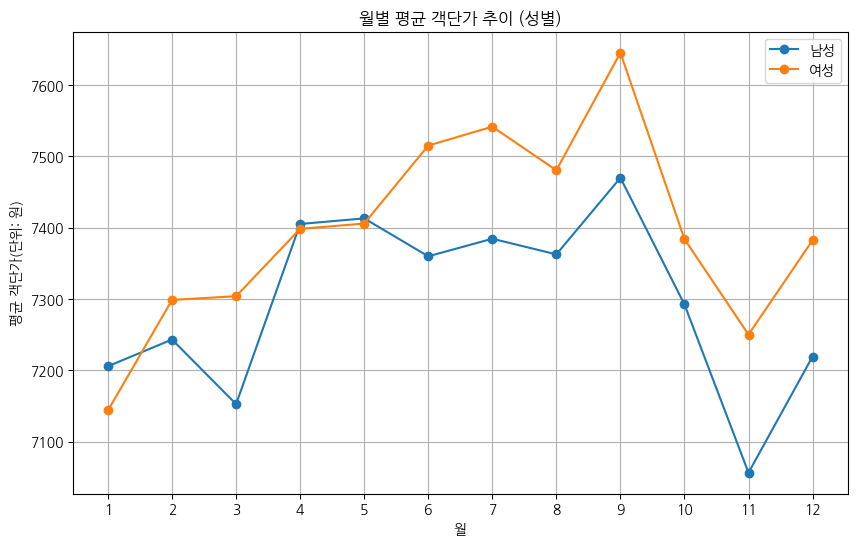

In [3]:
# idPOS 종류 수 계산
pos_count_by_month = df_users_itemsCategory.groupby(['Gender', 'SalesMonth'])['idPOS'].nunique().reset_index()

# 월별 총 매출액 계산
total_sales_by_month = df_users_itemsCategory.groupby(['Gender', 'SalesMonth'])['Price'].sum().reset_index()

# 객단가 계산
average_price_by_month = total_sales_by_month.copy()
average_price_by_month['AveragePrice'] = average_price_by_month['Price'] / pos_count_by_month['idPOS']

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(average_price_by_month['SalesMonth'].iloc[:12], average_price_by_month['AveragePrice'].iloc[:12], marker='o')
ax.plot(average_price_by_month['SalesMonth'].iloc[12:], average_price_by_month['AveragePrice'].iloc[12:], marker='o')
plt.legend(["남성","여성"])
plt.grid()
ax.set_xticks(range(1, 13))
ax.set_xlabel('월')
ax.set_ylabel('평균 객단가(단위: 원)')
ax.set_title('월별 평균 객단가 추이 (성별)')
plt.show()

## 월별 평균 객단가 추이 (나이대별)

In [4]:
# idPOS 종류 수 계산
pos_count_by_month = df_users_itemsCategory.groupby(['AgeGroup', 'SalesMonth'])['idPOS'].nunique().reset_index()

# 월별 총 매출액 계산
total_sales_by_month = df_users_itemsCategory.groupby(['AgeGroup', 'SalesMonth'])['Price'].sum().reset_index()

# 객단가 계산
average_price_by_month = total_sales_by_month.copy()
average_price_by_month['AveragePrice'] = average_price_by_month['Price'] / pos_count_by_month['idPOS']

,AgeGroup,SalesMonth,Price
0,10대,1,5188960
1,10대,2,3976850
2,10대,3,5582760
3,10대,4,6746060
4,10대,5,7363100
...,...,...,...
67,60대이상,8,3645160
68,60대이상,9,3368160
69,60대이상,10,3703130
70,60대이상,11,3498960


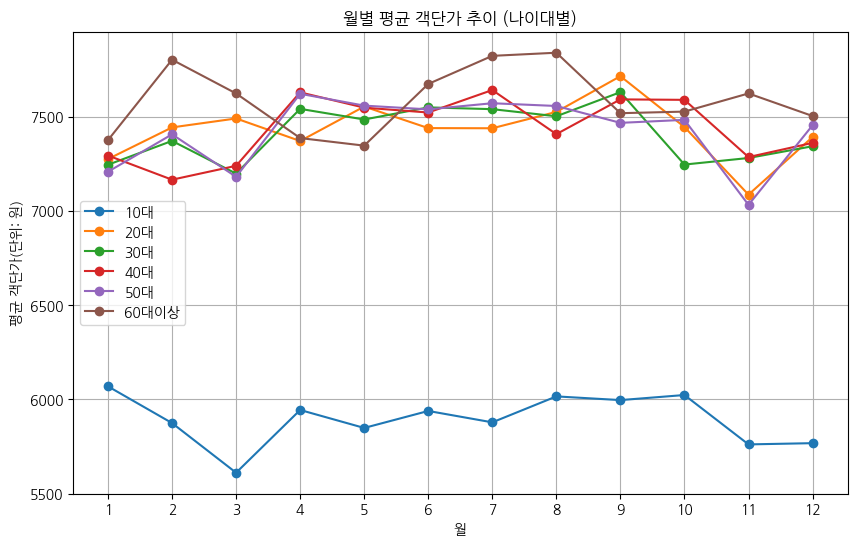

In [16]:
# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(average_price_by_month)//12):
    age_group_name = average_price_by_month.AgeGroup.unique()[i]
    ax.plot(average_price_by_month['SalesMonth'].iloc[12*i:12*(i+1)], average_price_by_month['AveragePrice'].iloc[12*i:12*(i+1)], marker='o')


plt.legend(list(average_price_by_month.AgeGroup.unique()))
plt.grid()
ax.set_xticks(range(1, 13))
ax.set_xlabel('월')
ax.set_ylabel('평균 객단가(단위: 원)')
ax.set_title('월별 평균 객단가 추이 (나이대별)')
plt.show()